<a href="https://colab.research.google.com/github/srizvi29/Sara_Rizvi_ML_repo/blob/main/Class_Assignment_2_Rizvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sara Rizvi**

**RIN: 662088215**

**Class Assignment 2**

# Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive


In [5]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Machine Learning/Rizvi_class_assignment2.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df

,x,y
0,1.719072e+03,80.476901
1,2.253936e+03,80.476901
2,2.856816e+03,80.625930
3,3.327047e+03,80.625930
4,4.146172e+03,80.625930
...,...,...
68,3.809624e+07,33.084949
69,1.902879e+07,30.253341
70,1.935372e+07,27.421755
71,3.809624e+07,27.570790


In [7]:
df.columns=['x','y']

In [8]:
df.head()

,x,y
0,1719.072267,80.476901
1,2253.936217,80.476901
2,2856.816413,80.625930
3,3327.046754,80.625930
4,4146.172316,80.625930


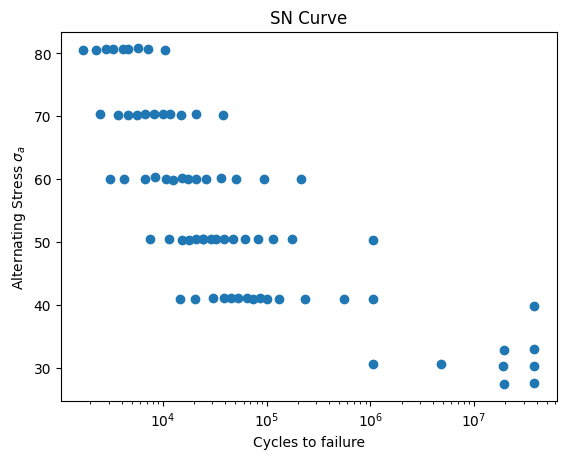

In [10]:
plt.scatter(df['x'].to_numpy(),df['y'].to_numpy())
plt.xlabel('Cycles to failure')
plt.ylabel('Alternating Stress $\sigma_a$')
plt.title('SN Curve')
plt.xscale('log')
plt.show()

# Data Prep step

In [11]:
# Sets every sample = 0 (tagged 0)
df['sample_type']=0

In [14]:
# Anything greater than 1e7 is a runoff pt (tags them)
df.loc[df['x'] > 1e7, 'sample_type'] = 1

In [16]:
#df

# Data visualization

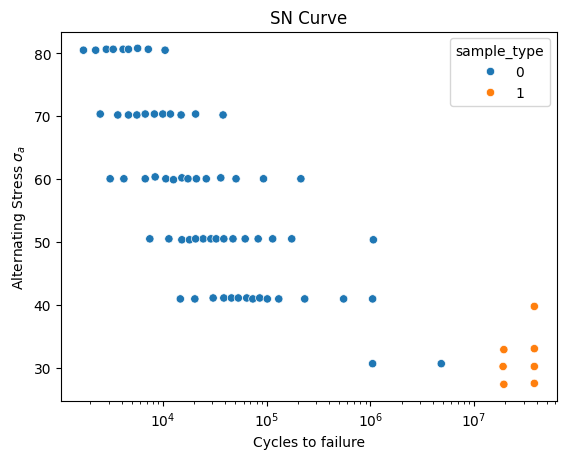

In [19]:
# Now we have two distinct points
sns.scatterplot(x='x',y='y',data=df,hue='sample_type')
plt.xlabel('Cycles to failure')
plt.ylabel('Alternating Stress $\sigma_a$')
plt.title('SN Curve')
plt.xscale('log')
plt.show()

In [20]:
# define features
X = df[['x','y']].to_numpy()
# define target
y = df['sample_type'].to_numpy() # sample_type is the target

In [23]:
print(X.shape)
print(y.shape)

(73, 2)
(73,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                          X, y,
                                          test_size=0.5,
                                          stratify=y,
                                          random_state=42) # stratify tells function to make dataset balanced nicely

In [25]:
print(y_train)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [26]:
print(y_test)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]


In [27]:
# Creates an instance (you want classifier with 3 neighbors)
knn = KNeighborsClassifier(n_neighbors=3) # shift+tab for documentation (set p = 2 for euclidean --> set automatically)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Automatically calculates accuracy
knn.score(X_test,y_test) # for this case, 100% accuracy becuase such a simple model (easy to find failur in this case)

1.0

In [30]:
# manually checking
knn.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [31]:
# best way to understand is a confusion matrix
cm = confusion_matrix(y_test,knn.predict(X_test))

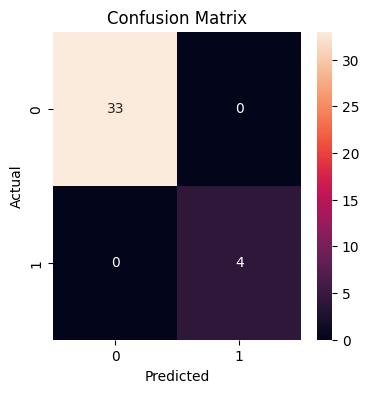

In [33]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
